# **Project Name**    - Netflix Movies and TV-shows 





##### **Project Type**    - Unsupervised


# **Project Details -**

In the Netflix Movies and TV-shows unsupervised machine learning project, the initial focus was on understanding and preparing the dataset for analysis and clustering. Key steps in data wrangling involved converting the 'date' feature to a pandas datetime object for ease of future manipulation.

Despite the presence of missing values in certain features, they were retained for exploratory data analysis (EDA) as their limited occurrence wouldn't significantly impact the analysis. Subsequently, attention shifted to leveraging the "Description" text feature for machine learning model training.

Text preprocessing steps were implemented to enhance the quality of the "Description" feature. These steps included converting text to lowercase, removing punctuation, stopwords, and extra whitespaces. The goal was to transform the textual data into a meaningful, multi-dimensional vector.

The Tfidf_netflixVectorizer was employed to convert the preprocessed text data into numerical format, limiting the maximum features to 400. This resulted in each observation being represented by a 400-length feature vector.

The project then explored clustering using two distinct algorithms: K-means and DBSCAN. These clustering models will aid in uncovering patterns and relationships within the Netflix dataset, providing valuable insights for subsequent analysis.



# **Problem Statement**


This dataset, sourced from Flixable, encompasses Netflix's catalog of TV shows and movies up to the year 2019. Our objectives include:

1. **Exploratory Data Analysis (EDA):**
   - Analyzing and extracting insights from the dataset.
   - Identifying patterns, trends, and statistical characteristics.

2. **Understanding Content Availability Across Countries:**
   - Investigating the distribution of content types in different countries.
   - Gaining insights into the regional preferences for TV shows and movies.

3. **Trend Analysis:**
   - Assessing whether Netflix has shifted its focus towards producing more TV shows compared to movies in recent years.
   - Examining any discernible trends in the content mix.

4. **Clustering Similar Content:**
   - Utilizing text-based features to cluster similar content.
   - Applying clustering algorithms to group TV shows and movies with comparable characteristics.

Through these analyses, we aim to unveil key insights into Netflix's content strategy, regional variations, and the evolving landscape of its offerings.

## ***About my data***

### Import Libraries

In [158]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings


#text preprocessing libraries
#import contractions
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer



from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import make_column_transformer


#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [159]:
#loading data
df_netflix = pd.read_csv(r"C:\Users\pc\Downloads\NJIT\ML Groupproject\Netflix data.csv")

### Dataset First View

In [160]:
df_netflix_copy = df_netflix.copy(deep = True)

In [161]:
# Dataset First Look
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [162]:
# Dataset Rows & Columns count
print("Total Rows: ", df_netflix.shape[0])
print("Total Columns: ", df_netflix.shape[1])

Total Rows:  7787
Total Columns:  12


### Dataset Information

In [163]:
# Dataset Info
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [164]:
# Dataset Duplicate Value Count
df_netflix.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [165]:
# Missing Values/Null Values Count
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

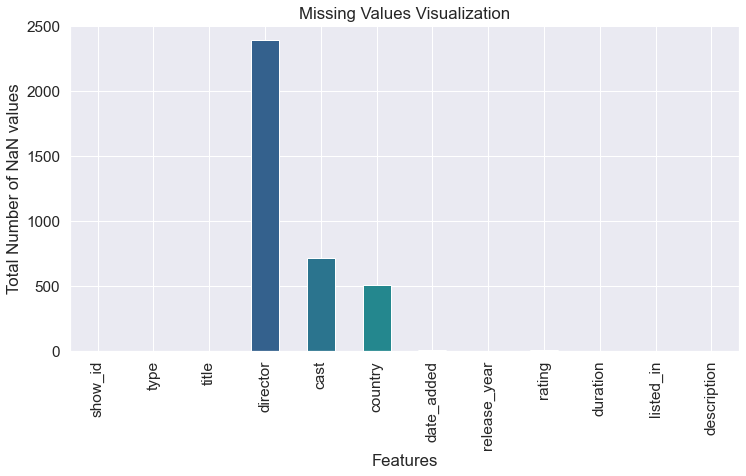

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_netflix is your DataFrame
plt.figure(figsize=(12, 6))
missing_values = df_netflix.isnull().sum()

# Using a color palette for better visibility
colors = sns.color_palette("viridis", len(missing_values))

missing_values.plot(kind='bar', color=colors)
plt.xlabel('Features')
plt.ylabel('Total Number of NaN values')
plt.title('Missing Values Visualization')
plt.show()


### Things about my dataset

In this unsupervised machine learning project, no target variable is present, making it a task focused on exploring patterns and relationships within the data. The dataset comprises 12 features with 7787 observations, encompassing details about movies and series. To ensure data integrity, initial preprocessing involved the removal of duplicated observations.

The dataset features a mix of categorical variables, text data (Description), and numerical values. Notably, four features—director, cast, country, and date_added—contain NaN values. Despite the absence of a target variable, the goal of this project is to leverage unsupervised learning techniques to uncover insights and patterns within the diverse set of features.

## *** Understanding Variables***

In [167]:
# Dataset Columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [168]:
#Categorical Dataset Describe
df_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID and it is not useful much.
type : This describes whether the particular observation is series or a movie
title : This is the title of the movie or show
director : Name of the director
cast : cast information
country: Name of the country where the movie/series are belongs to.
date_added : Date is added in Netflix
release_year : the date it was actually released.
rating : Tv rating of the show
.....


### Checking Unique Values for each variable.

In [169]:
def unique_counts(df_netflix1):
    for i in df_netflix1.columns:
        try:
            count = df_netflix1[i].nunique()
            print(i, ": ", count)
        except TypeError:
            print(f"{i} contains unhashable types and is skipped.")

# Call the function
unique_counts(df_netflix)


show_id :  7787
type :  2
title :  7787
director :  4049
cast :  6831
country :  681
date_added :  1565
release_year :  73
rating :  14
duration :  216
listed_in :  492
description :  7769


In [170]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [171]:
df_netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
37,s38,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,"June 1, 2019",2016,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin..."
1343,s1344,Movie,Chittagong,Bedabrata Pain,"Manoj Bajpayee, Barry John, Delzad Hiwale, Veg...","United States, India, Bangladesh","January 1, 2018",2012,NR,105 min,"Dramas, Independent Movies, International Movies",In the turbulent 1930s of British colonial Ind...
4383,s4384,TV Show,Nadiya’s Time to Eat,NaN,Nadiya Hussain,United Kingdom,"April 29, 2020",2020,TV-G,1 Season,"British TV Shows, International TV Shows, Real...","On this cooking show, Nadiya Hussain serves up..."
7529,s7530,Movie,Welcome to Sudden Death,Dallas Jackson,"Michael Jai White, Michael Eklund, Sabryn Rock...",United States,"September 29, 2020",2020,R,80 min,Action & Adventure,"At a basketball game, an ex-Special Forces off..."
6963,s6964,TV Show,The Unicorn,NaN,"Walton Goggins, Rob Corddry, Michaela Watkins,...",United States,"October 1, 2020",2019,TV-14,1 Season,"TV Comedies, TV Dramas",A widowed father of two girls navigates the wo...


In [172]:
# Write your code to make your dataset analysis ready.

#changing date_added feature into pandas datetime

def handle_date_added_feature(date_added_values):
    fin_date = []
    for date in date_added_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        else:
            #extracting day
            day = date.split()[1]
            day = int(day[:-1])
            #extracting month
            month = date.split()[0]
            month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
            month =  month_map[month]
            #extracting year
            year = date.split()[-1]
            fin_date.append(f'{year}-{month}-{day}')
    #returning as datetime
    return pd.to_datetime(fin_date)
   


In [173]:
df_netflix['date_added'] =  handle_date_added_feature(df_netflix.date_added)


In [174]:
df_netflix['cast'] = df_netflix['cast'].apply(lambda x : np.nan if pd.isna(x) else x.split(','))

###  Manipulations and insights 

This is unsupervised problem, so we going to use most of the features for EDA and our goal is to cluster based on the text features and I not going to spend much time in imputing Missing values and this wrangling I converted the date_added feature to pandas dataframe to use that feature effectively. Finally I changed the listed_in and cast to list so that we can use that in EDA little more easily.

## *** Data Vizualization and Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

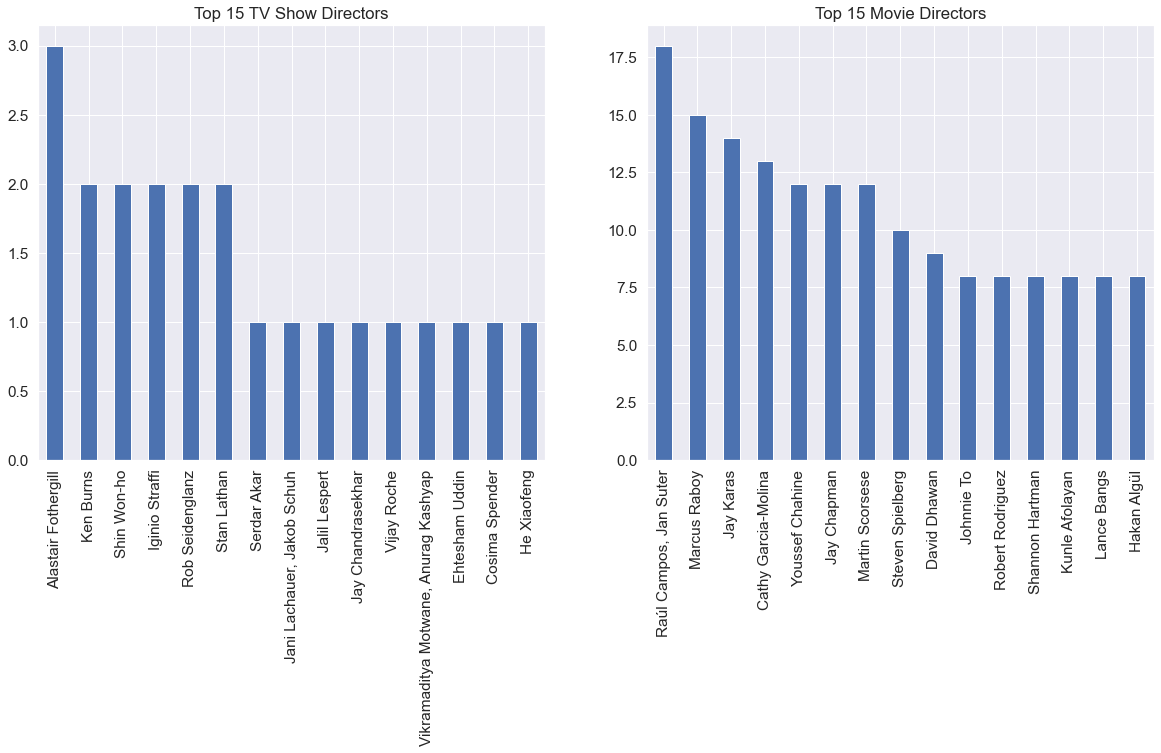

In [175]:
# Chart - 1 visualization code
tv_show = df_netflix[df_netflix.type == 'TV Show']
movie = df_netflix[df_netflix.type == 'Movie']


fig, (ax1, ax2) = plt.subplots(1,2)
tv_show.director.value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Directors',figsize = (20,8))
movie.director.value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Directors',figsize = (20,8))
plt.show()

#####  Insight(s) found from the chart

Alastair Fothergill directed most TV shows in our dataset with total count of 3 TV Shows. Raul Campos is the directed most films in our Movie category with the total movie count of 18.

#### Chart - 2

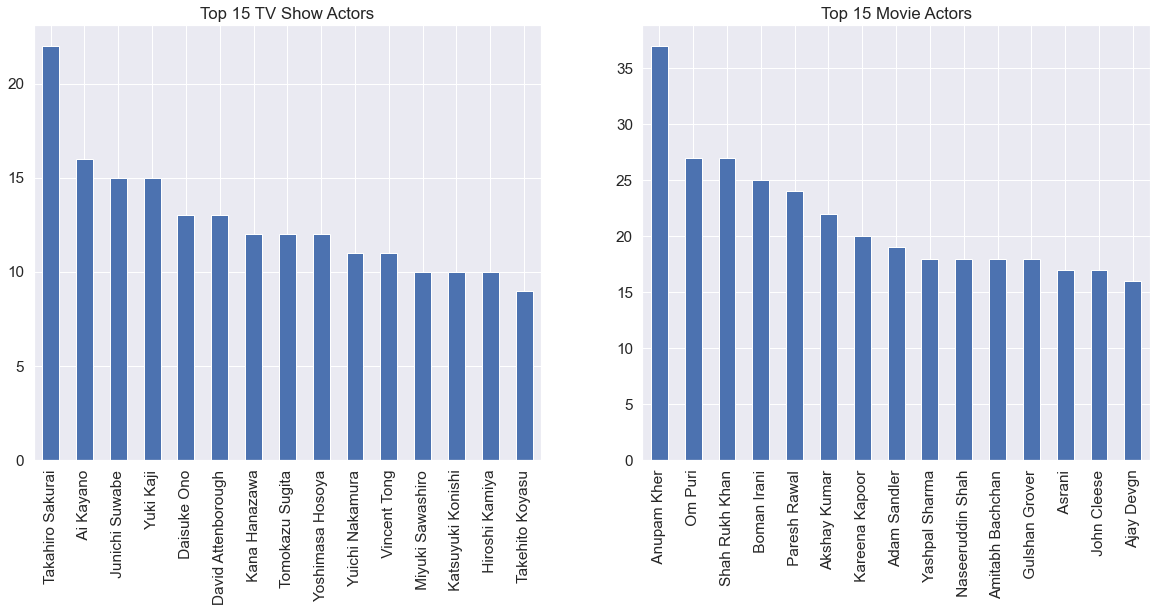

In [176]:
# Chart - 2 visualization code
tv_show_cst = []
for obs in tv_show.iterrows():
    if type(obs[1]['cast']) is list:
        tv_show_cst.extend(obs[1]['cast'])

movie_cst = []
for obs in movie.iterrows():
    if type(obs[1]['cast']) is list:
        movie_cst.extend(obs[1]['cast'])


fig, (ax1, ax2) = plt.subplots(1,2)
pd.Series(tv_show_cst).value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Actors',figsize = (20,8))
pd.Series(movie_cst).value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Actors',figsize = (20,8))
plt.show()

del tv_show_cst,movie_cst


#####  Insight(s) found from the chart

Takahiro Sakurai acted most TV shows in our dataset with total count of 25 TV Shows. Anupam Kher is the acted most films in our Movie category with the total movie count of 32.

#### Chart - 3

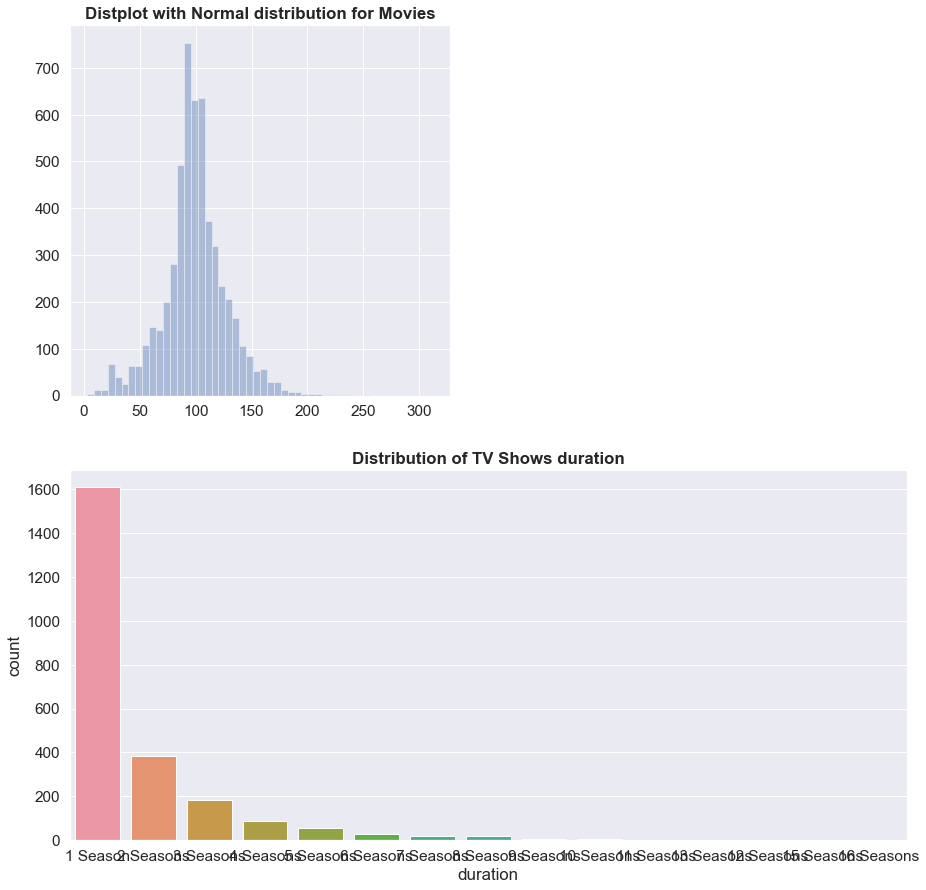

In [177]:
# Chart - 3 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

#Checking the distribution of TV SHOWS
plt.subplot(2,1,2)
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)
plt.show()

I used histogram to find the distribution between movie and its duration and I used bar-graph to find the distribution between Tv_show and its duration


##### Insight(s) found from the chart

Most TV shows in our dataset is released in only one season almost 1600 and Most films released, has 800 minutes duration and it is normaly distributed.

#### Chart - 4

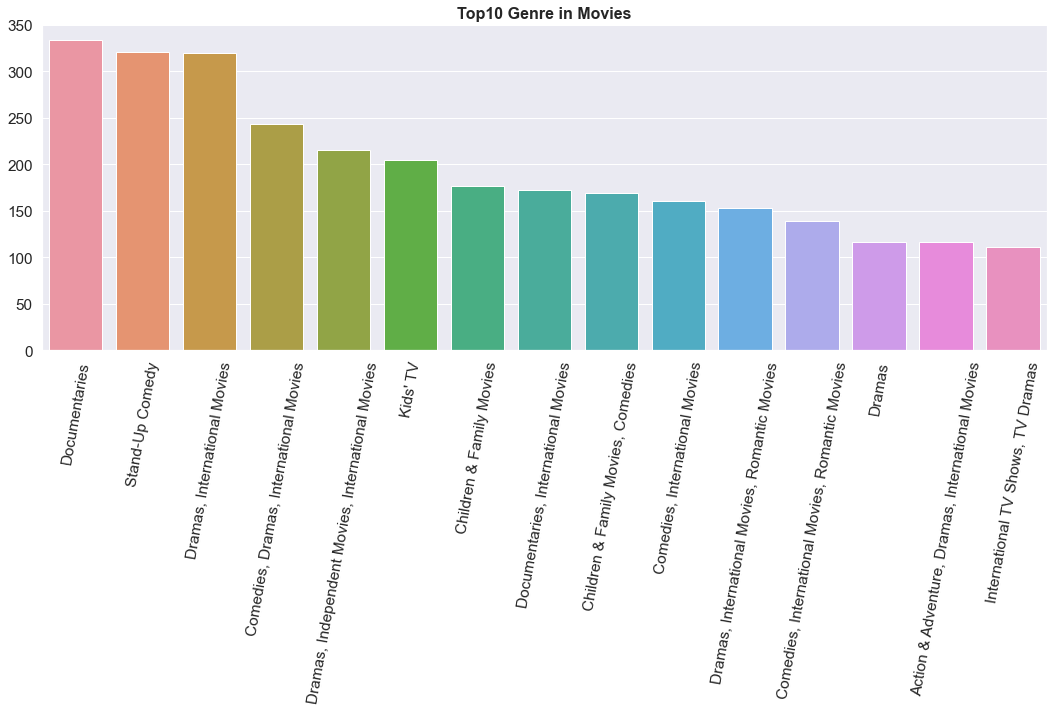

In [178]:
# Chart - 4 visualization code

# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df_netflix["listed_in"].value_counts().head(15).index,
            y = df_netflix["listed_in"].value_counts().head(15).values)
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()


##### Insight(s) found from the chart

The Documentaries, Stand_up comedy and Dramas,International Movies is very famous and most contents available in Netflix has same genre.

#### Chart - 5

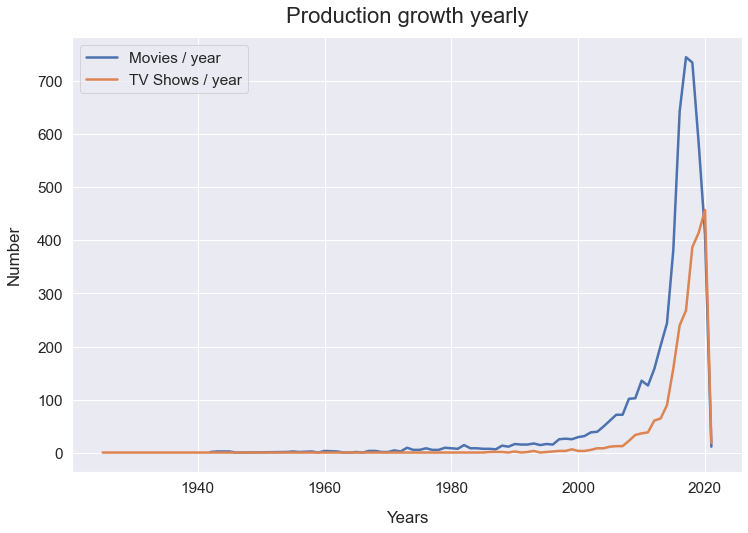

In [179]:
# Chart - 5 visualization code

# visualizing the movies and tv_shows based on the release year


movies_year =movie['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_show['release_year'].value_counts().sort_index(ascending=False)


sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, label="Movies / year")
tvshows_year.plot(figsize=(12, 8), linewidth=2.5,label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22)
plt.legend()
plt.show()

line plot helps us to identify and see the trend clearly especially over time. My aim is to know the count of total number of contents became available  over time. 


##### Insight(s) found from the chart

As we can see that Netflix acheived its peak between 2017 to 2020. This may because of Corona. Because because of corona people stayed in their house which make them to spend more time in internet.So it is clearly understood by Netflix and they make sure to own more contents in that period to attract more subscribers over other OTT platform.

#### Chart - 6

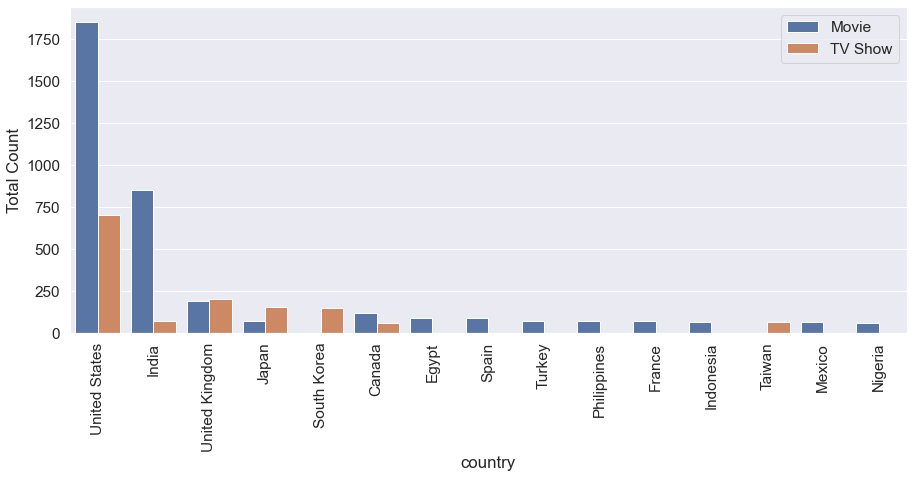

In [180]:
## Chart - 6 visualization code
# Count of TVshow and Movie produced in different country 


df_netflix_country = df_netflix.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (15, 6))
sns.barplot(data = df_netflix_country, x = df_netflix_country['country'][:20], y = df_netflix_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.ylabel('Total Count')
plt.show()

##### Insight(s) found from the chart

 Netflix has more number of United States's Tv shows and Movies. Followed by India, which has highest number of movies and very low number of TV_shows comparing to the others.

## *** Feature Engineering & Data Pre-processing***

I will be focusing exclusively on the "Description" feature for training the machine learning model. Fortunately, this feature does not contain any missing values, eliminating the need for imputation. Given that my analysis is centered around text data, I won't be addressing outliers or handling other variables. 

###  Textual Data Preprocessing 


#### 1. Expand Contraction

In [181]:
#decoding non-utf-8 characters
def remove_non_utf8_words(df_netflix,features_names):
    df_netflix = df_netflix.copy()
    for feature in features_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda x : x.replace('â€™',"'"))
        df_netflix[feature] = df_netflix[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
    return df_netflix

In [182]:
# Expand Contraction
def expand_contractions(df_netflix,feature_names):
    df_netflix = df_netflix.copy()
    for feature in feature_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda x : " ".join(x.split()))
        df_netflix[feature] = df_netflix[feature].apply(lambda x : contractions.fix(x))
    return df_netflix



#### 2. Lower Casing

In [183]:
# Lower Casing
def change_to_lower_case(df_netflix,feature_names):
    df_netflix = df_netflix.copy()
    for feature in feature_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda x : x.lower())
    return df_netflix

#### 3. Removing Punctuations

In [184]:
# Remove Punctuations
def remove_punctuations(df_netflix,features_columns):
    df_netflix = df_netflix.copy()
    punctuations = string.punctuation
    for feature in features_columns:
        df_netflix[feature] = df_netflix[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
    return df_netflix

#### 4. Removing URLs & Removing words and digits contain digits.

In [185]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(df_netflix,feature_names):
    df_netflix = df_netflix.copy()
    for feature in feature_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
    return df_netflix

def remove_words_with_digits(df_netflix, feature_names):
    df_netflix = df_netflix.copy()
    for feature in feature_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
    return df_netflix

#### 5. Removing Stopwords & Removing White spaces

In [186]:
# Remove Stopwords
def remove_stopwords(df_netflix,features_names):
    df_netflix = df_netflix.copy()
    eng_stopwords = set(stopwords.words('english'))
    for feature in features_names:
        df_netflix[feature] = df_netflix[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
    return df_netflix

#### 6. Tokenization and Text Normalization

In [187]:
# Tokenization
def tokenize_and_normalization(df_netflix,feature_names):
    lemmatizer=WordNetLemmatizer()
    for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
    return df_netflix

##### normalization technique I have you used 

I using Lemmatization normalization because it will do better than stemming. In stemming, there is chance that it will change the word completely. But in case of Lemmatization, it is not the case, it will try to maintain the original context of the sentence.

#### 7. Text Vectorization

In [188]:
class CustomTextDataPreprocessing(BaseEstimator,TransformerMixin):
    
    def __init__(self,feature_names):
        self.feature_names = feature_names
        return None
    
    #decoding non-utf-8 characters
    def remove_non_utf8_words(self,df_netflix,feature_names):
        df_netflix = df_netflix.copy()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x : x.replace('â€™',"'"))
            df_netflix[feature] = df_netflix[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
        return df_netflix
    
    # Expand Contraction
    def expand_contractions(self,df_netflix,feature_names):
        df_netflix = df_netflix.copy()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x : " ".join(x.split()))
            df_netflix[feature] = df_netflix[feature].apply(lambda x : contractions.fix(x))
        return df_netflix
    
        # Lower Casing
    def change_to_lower_case(self,df_netflix,feature_names):
        df_netflix = df_netflix.copy()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x : x.lower())
        return df_netflix

        # Remove Punctuations
    def remove_punctuations(self,df_netflix,features_names):
        df_netflix = df_netflix.copy()
        punctuations = string.punctuation
        for feature in features_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
        return df_netflix
    
    # Remove URLs & Remove words and digits contain digits
    def remove_urls(self,df_netflix,feature_names):
        df_netflix = df_netflix.copy()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
        return df_netflix

    def remove_words_with_digits(self,df_netflix, feature_names):
        df_netflix = df_netflix.copy()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
        return df_netflix
    
    # Remove Stopwords
    def remove_stopwords(self,df_netflix,feature_names):
        df_netflix = df_netflix.copy()
        eng_stopwords = set(stopwords.words('english'))
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
        return df_netflix

    # Tokenization
    def tokenize_and_normalization(self,df_netflix,feature_names):
        lemmatizer=WordNetLemmatizer()
        for feature in feature_names:
            df_netflix[feature] = df_netflix[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
        return df_netflix
     

    def fit(self,df_netflix):
        return self
    
    def transform(self,df_netflix):
        df_netflix =df_netflix.copy()
        #removing non utf8 words
        df_netflix = self.remove_non_utf8_words(df_netflix,self.feature_names)
        #expanding contractions 
        df_netflix = self.expand_contractions(df_netflix,self.feature_names)
        #changing all to lower case
        df_netflix = self.change_to_lower_case(df_netflix,self.feature_names)
        #remvoing punctuations
        df_netflix = self.remove_punctuations(df_netflix,self.feature_names)
        #removing urls
        df_netflix = self.remove_urls(df_netflix,self.feature_names)
        #removing words with digits
        df_netflix = self.remove_words_with_digits(df_netflix,self.feature_names)
        #remove stopwords
        df_netflix = self.remove_stopwords(df_netflix,self.feature_names)
        #remove tokenize and normalization
        df_netflix = self.tokenize_and_normalization(df_netflix,self.feature_names)
        

        return df_netflix
        

In [189]:
# Vectorizing Text
class CustomTfidVectorizer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_name,max_features = None):
        self.max_features = max_features
        self.feature_name = feature_name
        return None
    
    def fit(self,df_netflix):
        self.TfidVectorizer = TfidfVectorizer(max_features= self.max_features)
        self.TfidVectorizer.fit(df_netflix[self.feature_name])
        return self
    
    def transform(self,df_netflix):
        df_netflix = df_netflix.copy()
        vectors = self.TfidVectorizer.transform(df_netflix[self.feature_name]).toarray()
        df_netflix[self.TfidVectorizer.get_feature_names()] = vectors
        df_netflix.drop(self.feature_name,axis = 1,inplace = True)
        return df_netflix

#####  text vectorization technique I have you used

Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.Not like Bag of words and Count Vector technique which treats all words equally,TF-IDF can distinguish very common words or rare words

####  Feature Selection

I am going to use only Description feature so I am going to drop rest of the columns and use all the features got from vectorization.

There is no need to scale the data I've finally got, I've checked the data, the vectorization got is actually already in normalized form.

## ***7. ML Model Implementation***

In [190]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [191]:
import contractions

In [192]:
import nltk
# Download the 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
#using pipeline to transform our text data
text_feature_pipeline = Pipeline([
    ('text_preprocessing',CustomTextDataPreprocessing(feature_names=['description'])),
    ('vectorization',CustomTfidVectorizer(feature_name='description',max_features=400))
])


In [194]:
description_feature_vector = text_feature_pipeline.fit_transform(df_netflix).iloc[:,11:]

In [195]:
#printing the shapes of our data
print("Train data: ",description_feature_vector.shape)

Train data:  (7787, 398)


### ML Model - 1

In [196]:
SEED = 10

In [197]:
# ML Model - 1 Implementation
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
ssd= []  
  
#Using for loop for iterations from 1 to 30.  
for cluster in range(2, 15):  
    kmeans = KMeans(n_clusters=cluster,random_state= SEED)  
    kmeans.fit(description_feature_vector)  
    preds = kmeans.predict(description_feature_vector)
    score = silhouette_score(description_feature_vector, preds)
    print("For n_clusters = {}, Silhouette score is {}".format(cluster, score))
    ssd.append(kmeans.inertia_)  


For n_clusters = 2, Silhouette score is 0.005971402598598464
For n_clusters = 3, Silhouette score is 0.007216159901328363
For n_clusters = 4, Silhouette score is 0.009602532952960584
For n_clusters = 5, Silhouette score is 0.01222094217630066
For n_clusters = 6, Silhouette score is 0.013285395778872026
For n_clusters = 7, Silhouette score is 0.015386122508123339
For n_clusters = 8, Silhouette score is 0.016086199779265696
For n_clusters = 9, Silhouette score is 0.01803401147046511
For n_clusters = 10, Silhouette score is 0.01764018399994081
For n_clusters = 11, Silhouette score is 0.019548532007689832
For n_clusters = 12, Silhouette score is 0.021795528145762067
For n_clusters = 13, Silhouette score is 0.02099446115295347
For n_clusters = 14, Silhouette score is 0.022768941815436775


#### 1. ML Model used and it's performance using Evaluation metric Score Chart.

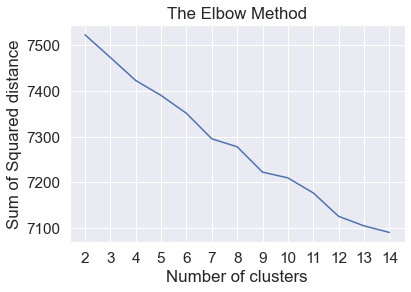

In [198]:
# Visualizing evaluation Metric Score chart
plt.plot(range(2, 15), ssd)  
plt.xticks(range(2,15))
plt.title('The Elbow Method')  
plt.xlabel('Number of clusters')  
plt.ylabel('Sum of Squared distance')  
plt.show()


From the above Elbow method and silhouette score I am choosing 12 would be the perfect number of clusters for this problem. So I am finally training kmeans with 12 clusters.

In [199]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 12, init='k-means++', random_state= SEED)  
y_predict= kmeans.fit_predict(description_feature_vector) 

In [200]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(description_feature_vector, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.021795528145762067


In [201]:

#Reducing the number of features to visualize it in 2D or 3D plot
pca = PCA(n_components = 3)
X = pca.fit_transform(description_feature_vector)


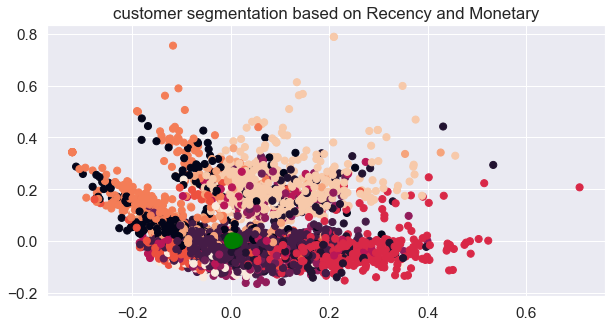

In [214]:
plt.figure(figsize=(10,5))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)
plt.show()

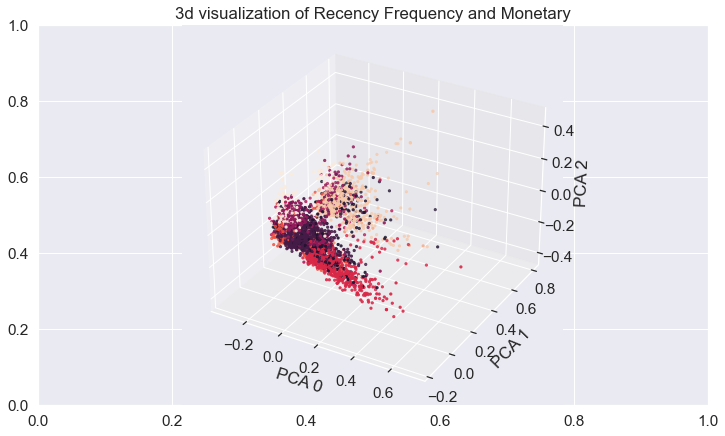

In [216]:
#plotting 3D Graph
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,7))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=X[:,0]
ys=X[:,1]
zs=X[:,2]
ax.scatter(xs,ys,zs,s=5,c = y_predict)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()

At the end, from the 2D and 3D plot we can say that K-means done not a bad job, but we cannot get into a conclusion by plotting this PCA features.

### ML Model - 2

In [204]:
#model 2

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(5,14)

silhouette_scores= []  
comb = []
  
#Using for loop for iterations from 1 to 30.  
for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters+
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(description_feature_vector)
        # Calculate Silhoutte Score and append to a list
        silhouette_scores.append(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

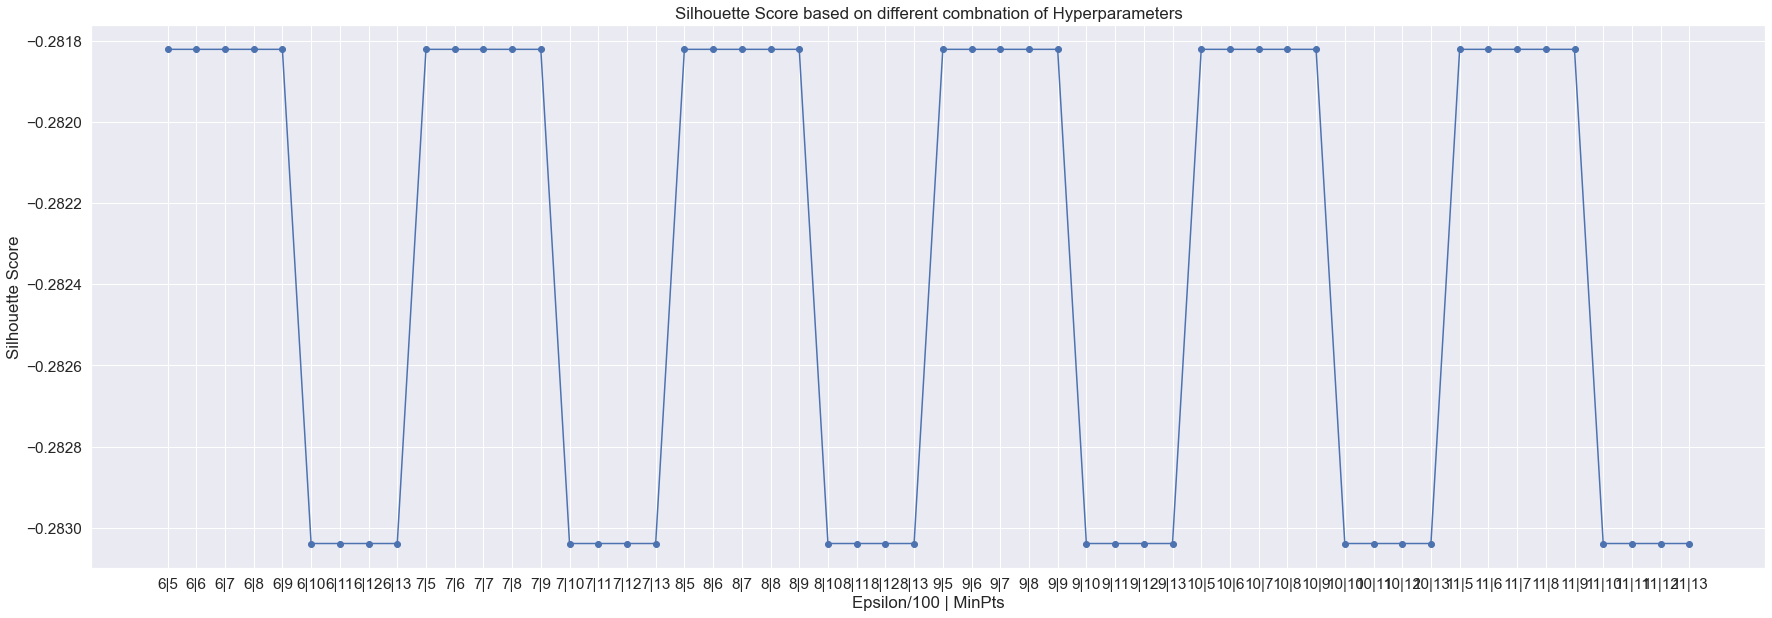

In [205]:
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(30,10))
plt.plot(comb, silhouette_scores, 'bo-')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

Looking at the above, we can see that eps=0.08 produce the highest scores.
A few combinations ended up having very similar scores, indicating that the clustering output for those combinations would also be similar.

In [206]:
final_model = DBSCAN(eps=6/100, min_samples=5)
clm = model.fit(description_feature_vector)
print(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))


-0.2830383756504724


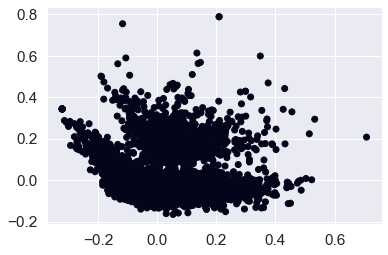

In [207]:
plt.scatter(X[:,0], X[:,1], c= clm.labels_)

Silhouette score helped us to find the best model. And helped us to choose the best model among these.

# Content based recommender system

In [208]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_netflix is your DataFrame with the Netflix dataset
# Assuming you have already performed text preprocessing and created a feature vector

# Example: Using 'description' as the feature for content-based recommendations
feature_name = 'description'
text_feature_vector = df_netflix[feature_name]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_feature_vector)

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the type of show watched
def get_recommendations(title, cosine_sim=cosine_sim, df=df_netflix, top_n=10):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top-n recommendations
    show_indices = [i[0] for i in sim_scores[1:top_n+1]]
    recommended_shows = df['title'].iloc[show_indices]

    return recommended_shows

In [209]:
# Example: Get recommendations for a specific show
show_title = "The Autopsy of Jane Doe"
recommendations = get_recommendations(show_title)

# Display the recommendations
print(f"Top 10 Recommendations for '{show_title}':")
print(recommendations)

Top 10 Recommendations for 'The Autopsy of Jane Doe':
5836                    Stranger Things
6292        The Devil and Father Amorth
1221    Carmel: Who Killed Maria Marta?
5174                            Retablo
907                       Big Stone Gap
5289                      Rowdy Rathore
944                               Black
6715                             The OA
3269                              Kaçak
6198                            The Car
Name: title, dtype: object


# **Conclusion**

I have tackled the challenge of unsupervised clustering using the Netflix Dataset. Initially, we employed basic Python code snippets to gain insights into the data, exploring its shape, number of features, data types, statistical information, and more. In the exploratory data analysis (EDA) phase, key findings emerged:

1. Netflix boasts a diverse collection of TV shows and movies, with a notable concentration in the United States.
2. The period between 2017 and 2020 witnessed a peak in Netflix content.
3. The majority of Netflix content originates from the United States, followed by India, which has a higher number of movies and a comparatively lower number of TV shows.

Clustering:

In the clustering phase, we applied the K-means algorithm and explored various cluster numbers. While initially suggesting 12 clusters, further analysis indicated that 9 clusters might be optimal. However, after evaluating the Silhouette score, we concluded that K-Means performed exceptionally well with 12 clusters.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.